# Data Exploration (Assignment 7)

* First off, thank you SO much Dr. O'Donnell for assisting me with the code during office hours! In this data exploration assignment, I will be investigating further trends with the data. 
* As a reminder, there are three buckets of data sets I will be examining: 1) the types of Philly crimes (from 2015 - 2020, each year constitutes its own data set) and 2) complaints made against police officers, the demographics of the police indicted, and 3) the demographics of those who filed the complaints against the police (from 2015 - 2020).  
* My main focus of this assignment was to analyze the combined 2015-2020 data sets from the 1st bucket! In this combined dataset, I explore the trends that occur within drug crimes, theft crimes, and rape crimes, including popular areas that reports stem from, popular times that they occur, and days / times during the year where certain crimes hit their peak. 

### Combining Drug Subsets (Assignment 7 five-step blocks) | #1

In this block, I will answer the question: what are the patterns associated with drug use from 2015-2020? My prior examinations only studied each year as its standalone set, so this will give a broader context! 

STEPS:
* Create a loop that will source out all drug-columns from years 2015-2020.
* Load the data frame for the current year.
* Rename columns as done in prior steps.
* Subset current df for `crimetype`.
* Add subset df to list using append function. 

In [1]:
import pandas as pd
import os

In [2]:
# Create a loop that will source out all drug-columns from years 2015-2020.
list_of_df = []
for y in range(2015,2021):
    
    # Load the data frame for the current year.
    fname = f'../data/philly{y}.csv'
    
    print('processing', fname)
    ydf = pd.read_csv(fname)
    
    # Rename columns as done in prior steps.
    ydf = ydf.rename(columns={
    'objectid':'id',
    'dc_dist':'distance',
    'dispatch_date_time':'datetime',
    'dispatch_date':'date',
    'dispatch_time':'time',
    'hour_':'hour',
    'dc_key':'key',
    'location_block':'location',
    'ucr_general':'ucr',
    'text_general_code':'crimetype',
    'point_x':'x',
    'point_y':'y',
    'lat':'latitutde',
    'lng':'longitude'})
    
    # Subset current df for crime type.
    drug_filter = ydf['crimetype']=='Narcotic / Drug Law Violations'
    drug_df = ydf[drug_filter]
    
    
    # Add subset df to list using append function.
    list_of_df.append(drug_df)

processing ../data/philly2015.csv
processing ../data/philly2016.csv
processing ../data/philly2017.csv


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processing ../data/philly2018.csv
processing ../data/philly2019.csv
processing ../data/philly2020.csv


In [3]:
len(list_of_df)

6

In [4]:
drugs_all_df = pd.concat(list_of_df).reset_index()

In [5]:
drugs_all_df.shape

(50754, 16)

* There are 50754 rows and 16 columns in this data frame. 

In [6]:
drugs_all_df.head(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
0,59407,909758,19,2,2015-07-01 17:05:00,2015-07-01,17:05:00,17.0,201519064562,5900 BLOCK ARCH ST,1800,Narcotic / Drug Law Violations,-75.239129,39.963369,39.963369,-75.239129
1,59589,910650,24,3,2015-03-01 01:08:00,2015-03-01,01:08:00,1.0,201524017473,2300 BLOCK E SOMERSET ST,1800,Narcotic / Drug Law Violations,-75.116657,39.984725,39.984725,-75.116657
2,59591,910657,19,2,2015-09-17 18:32:00,2015-09-17,18:32:00,18.0,201519094681,200 BLOCK N SALFORD ST,1800,Narcotic / Drug Law Violations,-75.239442,39.965301,39.965301,-75.239442
3,59675,911901,9,2,2015-11-04 15:20:00,2015-11-04,15:20:00,15.0,201509047002,400 BLOCK N 21ST ST,1800,Narcotic / Drug Law Violations,-75.173299,39.962095,39.962095,-75.173299
4,59676,911902,9,3,2015-11-02 22:10:00,2015-11-02,22:10:00,22.0,201509046762,400 BLOCK N 21ST ST,1800,Narcotic / Drug Law Violations,-75.173299,39.962095,39.962095,-75.173299
5,59690,907106,24,1,2015-10-12 17:53:00,2015-10-12,17:53:00,17.0,201524098442,3600 BLOCK FRANKFORD AVE,1800,Narcotic / Drug Law Violations,-75.101273,39.998426,39.998426,-75.101273
6,59693,908719,26,3,2015-12-30 13:24:00,2015-12-30,13:24:00,13.0,201526068924,2600 BLOCK KENSINGTON AVE,1800,Narcotic / Drug Law Violations,-75.127155,39.989124,39.989124,-75.127155
7,59765,909960,22,1,2015-06-03 19:09:00,2015-06-03,19:09:00,19.0,201522050108,2200 BLOCK N BROAD ST,1800,Narcotic / Drug Law Violations,-75.156598,39.986584,39.986584,-75.156598
8,59873,909188,26,1,2015-01-13 22:42:00,2015-01-13,22:42:00,22.0,201526002270,100 BLOCK W CUMBERLAND ST,1800,Narcotic / Drug Law Violations,-75.131832,39.987831,39.987831,-75.131832
9,59942,907599,25,3,2015-11-25 17:11:00,2015-11-25,17:11:00,17.0,201525096995,2700 BLOCK HOPE ST,1800,Narcotic / Drug Law Violations,-75.131455,39.990984,39.990984,-75.131455


In [7]:
drugs_all_df.tail(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
50744,120911,6181836,14,2,2020-11-06 20:26:54,2020-11-06,20:26:54,20.0,202014068211,5600 BLOCK CHEW AV,1800,Narcotic / Drug Law Violations,-75.164418,40.045160,40.045160,-75.164418
50745,120938,6179565,26,1,2020-11-06 20:37:53,2020-11-06,20:37:53,20.0,202026041710,800 BLOCK W YORK ST,1800,Narcotic / Drug Law Violations,-75.147062,39.988270,39.988270,-75.147062
50746,121015,6082996,8,1,2020-11-01 18:47:16,2020-11-01,18:47:16,18.0,202008033382,8300 BLOCK STATE RD,1800,Narcotic / Drug Law Violations,-75.014145,40.035484,40.035484,-75.014145
50747,121026,6087789,35,2,2020-11-01 20:14:00,2020-11-01,20:14:00,20.0,202035089255,1300 BLOCK LINDLEY AV,1800,Narcotic / Drug Law Violations,-75.144701,40.030161,40.030161,-75.144701
50748,121031,6085022,35,3,2020-11-02 15:45:33,2020-11-02,15:45:33,15.0,202035089423,6200 BLOCK N BOUVIER ST,1800,Narcotic / Drug Law Violations,-75.148361,40.048232,40.048232,-75.148361
50749,121067,6087527,35,3,2020-11-01 20:19:08,2020-11-01,20:19:08,20.0,202035089256,1500 BLOCK LINDLEY AV,1800,Narcotic / Drug Law Violations,-75.148373,40.030831,40.030831,-75.148373
50750,121068,6088267,24,1,2020-11-01 19:03:25,2020-11-01,19:03:25,19.0,202024079036,3200 BLOCK FRANKFORD AV,1800,Narcotic / Drug Law Violations,-75.110101,39.993109,39.993109,-75.110101
50751,121088,6087205,24,2,2020-11-02 20:17:36,2020-11-02,20:17:36,20.0,202024079242,1900 BLOCK E SOMERSET ST,1800,Narcotic / Drug Law Violations,-75.121542,39.990198,39.990198,-75.121542
50752,121111,6086485,39,1,2020-11-01 01:42:00,2020-11-01,01:42:00,1.0,202039065727,3500 BLOCK HENRY AVE,1800,Narcotic / Drug Law Violations,-75.183982,40.010663,40.010663,-75.183982
50753,121112,6086867,22,3,2020-10-29 03:02:30,2020-10-29,03:02:30,3.0,202022073214,1600 BLOCK N SYDENHAM ST,1800,Narcotic / Drug Law Violations,-75.160622,39.977887,39.977887,-75.160622


In [8]:
drugs_all_df.sample(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
20050,99732,1564603,25,3,2017-03-17 17:46:00,2017-03-17,17:46:00,17.0,201725021425,3400 BLOCK E ST,1800,Narcotic / Drug Law Violations,-75.118700,40.000437,40.000437,-75.118700
26623,67290,1080199,39,2,2018-06-11 15:46:00,2018-06-11,15:46:00,15.0,201839040415,2200 BLOCK W HUNTING PARK AVE,1800,Narcotic / Drug Law Violations,-75.164806,40.011348,40.011348,-75.164806
49010,69446,3415762,15,1,2020-06-16 09:11:00,2020-06-16,09:11:00,9.0,202015048669,4800 BLOCK FRANKFORD AVE,1800,Narcotic / Drug Law Violations,-75.081895,40.018606,40.018606,-75.081895
41493,109866,1749591,12,2,2019-09-05 17:20:00,2019-09-05,17:20:00,17.0,201912076889,1900 BLOCK S 70TH ST,1800,Narcotic / Drug Law Violations,-75.245437,39.923995,39.923995,-75.245437
29185,84964,1387290,12,4,2018-02-22 14:56:00,2018-02-22,14:56:00,14.0,201812013612,5200 BLOCK LITCHFIELD ST,1800,Narcotic / Drug Law Violations,-75.223446,39.943824,39.943824,-75.223446
7660,59544,935649,25,3,2016-06-08 20:03:00,2016-06-08,20:03:00,20.0,201625048022,100 BLOCK W SOMERSET ST,1800,Narcotic / Drug Law Violations,-75.130624,39.992478,39.992478,-75.130624
37121,77018,1226440,3,2,2019-05-11 20:09:42,2019-05-11,20:09:42,20.0,201903031402,500 BLOCK MC KEAN ST,1800,Narcotic / Drug Law Violations,-75.154817,39.923676,39.923676,-75.154817
47757,42879,3125249,17,2,2020-04-24 21:45:00,2020-04-24,21:45:00,21.0,202017012738,1500 BLOCK S NAPA ST,1800,Narcotic / Drug Law Violations,-75.196431,39.934698,39.934698,-75.196431
39231,96606,1548916,16,2,2019-06-15 21:08:00,2019-06-15,21:08:00,21.0,201916028577,4100 BLOCK LANCASTER AVE,1800,Narcotic / Drug Law Violations,-75.205590,39.965089,39.965089,-75.205590
1338,74106,1098624,15,1,2015-12-03 09:16:00,2015-12-03,09:16:00,9.0,201515117896,5000 BLOCK OXFORD AVE,1800,Narcotic / Drug Law Violations,-75.085161,40.021630,40.021630,-75.085161


In [9]:
drugs_all_df.groupby('hour').size().plot(kind='bar', figsize=(12,4))

<AxesSubplot:xlabel='hour'>

In [10]:
drugs_all_df['hour'].value_counts()

19.0    5451
20.0    5084
18.0    4538
17.0    4262
21.0    4179
22.0    3041
16.0    2880
13.0    2607
14.0    2456
12.0    2428
15.0    2384
11.0    2324
10.0    1913
23.0    1775
9.0     1412
0.0     1071
1.0      853
8.0      648
2.0      540
3.0      347
7.0      194
4.0      176
5.0      107
6.0       84
Name: hour, dtype: int64

In narrative form, hour 19 (7:00 PM) and hour 20 (8:00 PM) result in the most drug crime occurrences. Hour 6 (6:00 AM) has the least drug crime occurrences.

Some observations:
* Hour 11 - Hour 15 are relatively fair game (with the same frequency range), but the peak starts increasing starting with Hour 16, going onto Hour 17. 
* It would be nice to know the age ranges of those who were connected to these crimes! The trends make sense because if it were an adult working a 9-5 job, they would most likely be inactive during working hours. If it were a student, school usually ends around that time as well. These trends, to me, seem a clear reflection of the person's lifestyle. 

In [11]:
drugs_all_df['year']=drugs_all_df['date'].str[:4]

In [12]:
drugs_all_df.groupby(['year','hour']).size()

year  hour
2015  0.0     187
      1.0     119
      2.0      91
      3.0      50
      4.0      26
             ... 
2020  19.0    662
      20.0    546
      21.0    386
      22.0    266
      23.0    110
Length: 144, dtype: int64

### Combining Theft Subsets (Assignment 7 five-step blocks) | #2

In this block, I will answer the question: what are the patterns associated with thefts from 2015-2020? My prior examinations only studied each year as its standalone set, so this will give a broader context! 

STEPS:
* Create a loop that will source out all theft-columns from years 2015-2020.
* Load the data frame for the current year.
* Rename columns as done in prior steps.
* Subset current df for `crimetype`.
* Add subset df to list using append function. 

In [13]:
# Create a loop that will source out all theft-columns from years 2015-2020.
list_of_df1 = []
for y in range(2015,2021):
    
    # Load the data frame for the current year.
    fname = f'../data/philly{y}.csv'
    
    print('processing', fname)
    ydf = pd.read_csv(fname)
    
    # Rename columns as done in prior steps.
    ydf = ydf.rename(columns={
    'objectid':'id',
    'dc_dist':'distance',
    'dispatch_date_time':'datetime',
    'dispatch_date':'date',
    'dispatch_time':'time',
    'hour_':'hour',
    'dc_key':'key',
    'location_block':'location',
    'ucr_general':'ucr',
    'text_general_code':'crimetype',
    'point_x':'x',
    'point_y':'y',
    'lat':'latitutde',
    'lng':'longitude'})
    
    # Subset current df for crime type.
    theft_filter = ydf['crimetype']=='Thefts'
    theft_df = ydf[theft_filter]
    
    
    # Add subset df to list using append function.
    list_of_df1.append(theft_df)

processing ../data/philly2015.csv
processing ../data/philly2016.csv
processing ../data/philly2017.csv


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processing ../data/philly2018.csv
processing ../data/philly2019.csv
processing ../data/philly2020.csv


In [14]:
theft_all_df = pd.concat(list_of_df1).reset_index()

In [15]:
theft_all_df.shape

(133789, 16)

* There are 133789 rows and 16 columns in this data frame. 

In [16]:
theft_all_df.head(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
0,0,111,9,1,2015-04-15 11:14:00,2015-04-15,11:14:00,11.0,201509015124,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
1,1,2,9,2,2015-01-31 12:45:00,2015-01-31,12:45:00,12.0,201509003948,1400 BLOCK SPRING GARDEN ST 210,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
2,2,3,9,2,2015-02-17 20:21:00,2015-02-17,20:21:00,20.0,201509006594,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
3,3,4,9,2,2015-04-01 08:05:00,2015-04-01,08:05:00,8.0,201509012932,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
4,4,5,9,2,2015-10-26 18:06:00,2015-10-26,18:06:00,18.0,201509045628,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
5,6,79,6,1,2015-09-14 08:57:00,2015-09-14,08:57:00,8.0,201506043727,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
6,10,191,77,A,2015-07-10 13:05:00,2015-07-10,13:05:00,13.0,201577003871,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
7,11,192,77,A,2015-07-13 08:48:00,2015-07-13,08:48:00,8.0,201577003922,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
8,12,193,77,A,2015-07-14 13:14:00,2015-07-14,13:14:00,13.0,201577003947,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
9,13,194,77,A,2015-07-17 10:26:00,2015-07-17,10:26:00,10.0,201577004010,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706


In [17]:
theft_all_df.tail(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
133779,120094,5965393,24,1,2020-10-28 12:41:09,2020-10-28,12:41:09,12.0,202024078040,3800 BLOCK LAWNDALE ST,600,Thefts,-75.106675,40.006263,40.006263,-75.106675
133780,120105,5966265,17,3,2020-10-28 17:20:00,2020-10-28,17:20:00,17.0,202017030324,1500 BLOCK S 17TH ST,600,Thefts,-75.173021,39.931723,39.931723,-75.173021
133781,120137,5965017,3,3,2020-10-28 18:19:00,2020-10-28,18:19:00,18.0,202003056406,800 BLOCK REED ST,600,Thefts,-75.158822,39.931790,39.931790,-75.158822
133782,120166,6054508,39,2,2020-10-31 14:35:54,2020-10-31,14:35:54,14.0,202039065605,3600 BLOCK N 21ST ST,600,Thefts,-75.162869,40.009396,40.009396,-75.162869
133783,120182,5967143,25,1,2020-10-28 12:28:00,2020-10-28,12:28:00,12.0,202025070537,4000 BLOCK N DARIEN ST,600,Thefts,-75.141146,40.013375,40.013375,-75.141146
133784,120212,5964640,22,1,2020-10-27 18:41:00,2020-10-27,18:41:00,18.0,202022072876,1900 BLOCK LIACOURAS WALK,600,Thefts,-75.155678,39.982861,39.982861,-75.155678
133785,120309,6054988,14,4,2020-10-31 14:44:39,2020-10-31,14:44:39,14.0,202014066964,8400 BLOCK TEMPLE RD,600,Thefts,-75.175943,40.078942,40.078942,-75.175943
133786,120323,5966804,3,3,2020-10-28 13:46:00,2020-10-28,13:46:00,13.0,202003056377,1100 BLOCK S 13TH ST,600,Thefts,-75.164862,39.936703,39.936703,-75.164862
133787,120368,5967252,22,3,2020-10-28 11:42:00,2020-10-28,11:42:00,11.0,202022073059,1500 BLOCK N 13TH ST,600,Thefts,-75.156363,39.975697,39.975697,-75.156363
133788,120427,5948511,35,2,2020-10-27 19:43:23,2020-10-27,19:43:23,19.0,202035087882,4800 BLOCK N WARNOCK ST,600,Thefts,-75.141229,40.026395,40.026395,-75.141229


In [18]:
theft_all_df.sample(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
53443,14352,213842,3,1,2017-09-04 17:18:00,2017-09-04,17:18:00,17.0,201703048932,500 BLOCK S 02ND ST,600,Thefts,-75.145678,39.941807,39.941807,-75.145678
16995,37514,549662,22,3,2015-07-01 02:53:00,2015-07-01,02:53:00,2.0,201522058815,1500 BLOCK N BROAD ST,600,Thefts,-75.158213,39.976557,39.976557,-75.158213
89351,51627,847936,12,4,2018-08-21 21:16:00,2018-08-21,21:16:00,21.0,201812061301,5400 BLOCK MALCOLM ST,600,Thefts,-75.229880,39.944378,39.944378,-75.229880
17120,37962,583305,24,2,2015-05-04 12:58:00,2015-05-04,12:58:00,12.0,201524039307,2100 BLOCK E MONMOUTH ST,600,Thefts,-75.115959,39.988687,39.988687,-75.115959
55552,18487,286243,39,1,2017-05-29 00:21:00,2017-05-29,00:21:00,0.0,201739040336,200 BLOCK W CHELTEN AV,600,Thefts,-75.178605,40.030809,40.030809,-75.178605
90704,56427,887343,16,1,2018-06-08 14:45:00,2018-06-08,14:45:00,14.0,201816024775,3600 BLOCK POWELTON AV,600,Thefts,-75.195076,39.959808,39.959808,-75.195076
55462,18311,281580,19,1,2017-10-14 20:34:00,2017-10-14,20:34:00,20.0,201719088183,100 BLOCK N 63RD ST,600,Thefts,-75.246562,39.965575,39.965575,-75.246562
130168,92981,5016499,25,1,2020-09-13 16:09:00,2020-09-13,16:09:00,16.0,202025059730,3900 BLOCK N PERCY ST,600,Thefts,-75.142290,40.012311,40.012311,-75.142290
59383,27420,402959,19,3,2017-05-19 16:21:00,2017-05-19,16:21:00,16.0,201719042052,5000 BLOCK CITY AVE,600,Thefts,-75.230092,39.999195,39.999195,-75.230092
6772,11757,180687,8,3,2015-10-07 22:11:00,2015-10-07,22:11:00,22.0,201508038461,4300 BLOCK BYBERRY RD,600,Thefts,-74.961952,40.087595,40.087595,-74.961952


<AxesSubplot:xlabel='hour'>

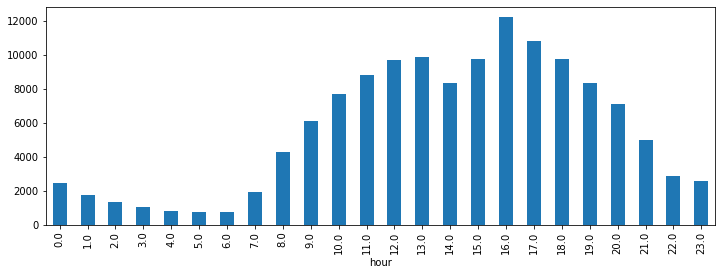

In [19]:
theft_all_df.groupby('hour').size().plot(kind='bar', figsize=(12,4))

In [20]:
theft_all_df['hour'].value_counts()

16.0    12201
17.0    10819
13.0     9888
18.0     9770
15.0     9728
12.0     9668
11.0     8826
19.0     8329
14.0     8315
10.0     7667
20.0     7117
9.0      6111
21.0     4959
8.0      4253
22.0     2839
23.0     2538
0.0      2421
7.0      1912
1.0      1766
2.0      1354
3.0      1024
4.0       793
5.0       755
6.0       736
Name: hour, dtype: int64

In narrative form, Hour 16 (4:00 PM) and Hour 17 (5:00 PM) result in the most theft crime occurrences. Hour 6 (6:00 AM) has the least theft crime occurrences.

Some observations:
* The distribution is left-skewed, meaning it has a negative skewness. This means that afternoon / evening are the peak hours for when theft crimes occur. 
* Could people be stealing drugs? Since Hour 17 is also when drug crimes become more active. 

### Combining Rape Subsets (Assignment 7 five-step blocks) | #3

In this block, I will answer the question: what are the patterns associated with rape crimes from 2015-2020? My prior examinations only studied each year as its standalone set, so this will give a broader context! 

STEPS:
* Create a loop that will source out all rape-columns from years 2015-2020.
* Load the data frame for the current year.
* Rename columns as done in prior steps.
* Subset current df for `crimetype`.
* Add subset df to list using append function. 

In [21]:
# Create a loop that will source out all rape-columns from years 2015-2020.
list_of_df2 = []
for y in range(2015,2021):
    
    # Load the data frame for the current year.
    fname = f'../data/philly{y}.csv'
    
    print('processing', fname)
    ydf = pd.read_csv(fname)
    
    # Rename columns as done in prior steps.
    ydf = ydf.rename(columns={
    'objectid':'id',
    'dc_dist':'distance',
    'dispatch_date_time':'datetime',
    'dispatch_date':'date',
    'dispatch_time':'time',
    'hour_':'hour',
    'dc_key':'key',
    'location_block':'location',
    'ucr_general':'ucr',
    'text_general_code':'crimetype',
    'point_x':'x',
    'point_y':'y',
    'lat':'latitutde',
    'lng':'longitude'})
    
    # Subset current df for crime type.
    rape_filter = ydf['crimetype']=='Rape'
    rape_df = ydf[rape_filter]
    
    
    # Add subset df to list using append function.
    list_of_df2.append(rape_df)

processing ../data/philly2015.csv
processing ../data/philly2016.csv
processing ../data/philly2017.csv


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


processing ../data/philly2018.csv
processing ../data/philly2019.csv
processing ../data/philly2020.csv


In [22]:
rape_all_df = pd.concat(list_of_df2).reset_index()

In [23]:
rape_all_df.shape

(6426, 16)

* There are 6426 rows and 16 columns in this data frame. 

In [24]:
rape_all_df.head(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
0,156,1933,5,3,2015-07-19 21:57:00,2015-07-19,21:57:00,21.0,201505012327,7900 BLOCK HENRY AVE,200,Rape,-75.230297,40.056598,40.056598,-75.230297
1,199,2424,35,1,2015-06-22 11:41:00,2015-06-22,11:41:00,11.0,201535052458,100 BLOCK E GODFREY AVE,200,Rape,-75.114734,40.045434,40.045434,-75.114734
2,215,2440,35,1,2015-04-15 11:46:00,2015-04-15,11:46:00,11.0,201535029754,100 BLOCK E GODFREY AVE,200,Rape,-75.114734,40.045434,40.045434,-75.114734
3,238,2779,2,2,2015-02-03 02:58:00,2015-02-03,02:58:00,2.0,201502006402,4200 BLOCK E ROOSEVELT BLVD,200,Rape,-75.106317,40.029947,40.029947,-75.106317
4,245,2740,2,2,2015-02-03 03:49:00,2015-02-03,03:49:00,3.0,201502006403,4200 BLOCK E ROOSEVELT BLVD,200,Rape,-75.106317,40.029947,40.029947,-75.106317
5,292,6061,39,2,2015-08-18 21:03:00,2015-08-18,21:03:00,21.0,201539067319,1400 BLOCK W ERIE AVE,200,Rape,-75.151312,40.009283,40.009283,-75.151312
6,321,5301,2,3,2015-06-16 19:40:00,2015-06-16,19:40:00,19.0,201502038841,800 BLOCK COTTMAN AVE B2,200,Rape,-75.088428,40.061403,40.061403,-75.088428
7,322,5302,2,3,2015-06-28 08:18:00,2015-06-28,08:18:00,8.0,201502041402,800 BLOCK COTTMAN AVE,200,Rape,-75.088428,40.061403,40.061403,-75.088428
8,426,3239,24,2,2015-10-14 17:29:00,2015-10-14,17:29:00,17.0,201524099179,2100 BLOCK BELLMORE ST,200,Rape,-75.115049,39.989236,39.989236,-75.115049
9,492,9298,14,3,2015-03-17 03:05:00,2015-03-17,03:05:00,3.0,201514019308,6300 BLOCK GREENE ST,200,Rape,-75.187033,40.040367,40.040367,-75.187033


In [25]:
rape_all_df.tail(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
6416,117383,4116963,12,3,2020-06-19 07:38:00,2020-06-19,07:38:00,7.0,202012048787,6500 BLOCK GRAYS AVE,200,Rape,-75.232436,39.922824,39.922824,-75.232436
6417,117706,3916968,18,2,2020-06-11 22:51:00,2020-06-11,22:51:00,22.0,202018044994,5200 BLOCK LARCHWOOD AVE,200,Rape,-75.227027,39.952033,39.952033,-75.227027
6418,117710,3401220,14,1,2020-06-15 17:53:12,2020-06-15,17:53:12,17.0,202014039222,6500 BLOCK E WISTER ST,200,Rape,-75.157952,40.053572,40.053572,-75.157952
6419,118363,5959133,8,1,2020-10-28 09:20:04,2020-10-28,09:20:04,9.0,202008032930,8000 BLOCK STATE RD,200,Rape,-75.021704,40.031271,40.031271,-75.021704
6420,118616,5962947,8,2,2020-10-28 11:34:55,2020-10-28,11:34:55,11.0,202008032946,3300 BLOCK RED LION RD,200,Rape,-74.988246,40.075962,40.075962,-74.988246
6421,119014,5961453,24,2,2020-09-12 05:36:00,2020-09-12,05:36:00,5.0,202024065734,3000 BLOCK HARTVILLE ST,200,Rape,-75.120216,39.995580,39.995580,-75.120216
6422,119307,6044927,2,3,2020-10-31 18:00:47,2020-10-31,18:00:47,18.0,202002050898,7600 BLOCK E ROOSEVELT BLVD,200,Rape,-75.052421,40.050809,40.050809,-75.052421
6423,119308,6044928,2,3,2020-10-31 18:00:52,2020-10-31,18:00:52,18.0,202002050899,7600 BLOCK E ROOSEVELT BLVD,200,Rape,-75.052421,40.050809,40.050809,-75.052421
6424,120277,5967600,15,2,2020-10-28 14:40:42,2020-10-28,14:40:42,14.0,202015086375,5400 BLOCK CHARLES ST,200,Rape,-75.070291,40.021081,40.021081,-75.070291
6425,120880,5948042,18,2,2020-10-27 22:12:30,2020-10-27,22:12:30,22.0,202018074073,0 BLOCK S 56TH ST A,200,Rape,-75.232959,39.960603,39.960603,-75.232959


In [26]:
rape_all_df.sample(10)

,index,id,distance,psa,datetime,date,time,hour,key,location,ucr,crimetype,x,y,latitutde,longitude
1826,22511,320900,6,3,2016-06-30 21:17:00,2016-06-30,21:17:00,21.0,201606028345,100 BLOCK S 11TH ST,200,Rape,-75.158711,39.949783,39.949783,-75.158711
3373,37046,554729,12,3,2017-08-10 19:05:00,2017-08-10,19:05:00,19.0,201712058404,6200 BLOCK PASCHALL AVE,200,Rape,-75.230061,39.926422,39.926422,-75.230061
3473,42105,668985,35,3,2017-08-03 18:52:00,2017-08-03,18:52:00,18.0,201735065801,5900 BLOCK N 19TH ST,200,Rape,-75.152310,40.044183,40.044183,-75.152310
662,28781,450497,19,2,2015-03-23 08:56:00,2015-03-23,08:56:00,8.0,201519025875,300 BLOCK N 55TH ST,200,Rape,-75.229799,39.966017,39.966017,-75.229799
954,40702,607372,2,2,2015-05-22 11:08:00,2015-05-22,11:08:00,11.0,201502032361,500 BLOCK VAN KIRK ST,200,Rape,-75.100259,40.042889,40.042889,-75.100259
1511,8740,133043,18,3,2016-12-10 16:01:00,2016-12-10,16:01:00,16.0,201618090764,2900 BLOCK CHESTNUT ST,200,Rape,-75.183399,39.952519,39.952519,-75.183399
6062,62376,5121754,15,2,2020-09-18 20:46:58,2020-09-18,20:46:58,20.0,202015074734,4000 BLOCK HIGBEE ST,200,Rape,-75.063807,40.024920,40.024920,-75.063807
5084,23673,375246,25,4,2019-01-03 19:40:00,2019-01-03,19:40:00,19.0,201925000776,1300 BLOCK W RUSH ST,200,Rape,-75.153213,39.996059,39.996059,-75.153213
1575,10729,160636,22,2,2016-10-24 16:27:00,2016-10-24,16:27:00,16.0,201622087063,3100 BLOCK W BERKS ST,200,Rape,-75.185230,39.985167,39.985167,-75.185230
2283,42374,672105,39,2,2016-05-11 20:06:00,2016-05-11,20:06:00,20.0,201639038681,3800 BLOCK N BOUVIER ST,200,Rape,-75.156114,40.012143,40.012143,-75.156114


<AxesSubplot:xlabel='hour'>

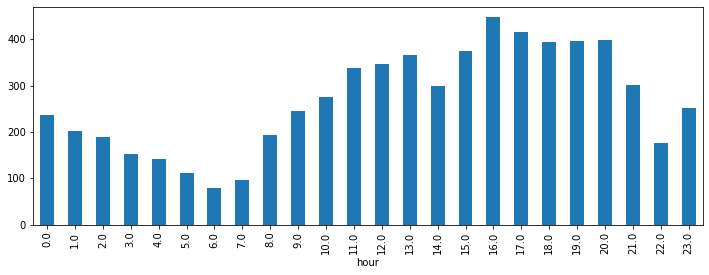

In [27]:
rape_all_df.groupby('hour').size().plot(kind='bar', figsize=(12,4))

In [28]:
rape_all_df['hour'].value_counts()

16.0    447
17.0    415
20.0    399
19.0    397
18.0    393
15.0    375
13.0    365
12.0    346
11.0    337
21.0    302
14.0    300
10.0    275
23.0    252
9.0     245
0.0     237
1.0     203
8.0     193
2.0     189
22.0    176
3.0     152
4.0     141
5.0     112
7.0      97
6.0      78
Name: hour, dtype: int64

In narrative form, Hour 16 (4:00 PM) and Hour 17 (5:00 PM) result in the most rape crime occurrences. Hour 6 (6:00 AM) has the least rape crime occurrences.

Some observations:
* This distribution looks dramatically different from my other graphs!
* Given that many of the bars are higher than my previous graphs, this suggests that for rape crimes, there is less of a proportional difference between time of occurrence. 
* For instance, the peak hours and inactive hours for rape crimes are the same as that of theft; but the range between the maximum and minimum values is less for that of rape. 
* While there is still a very drastic difference between the frequency of 4:00 PM rape crimes and 6:00 AM rape crimes, I am hypothesizing that rape crimes are less influenced by time than drugs and theft. 

### Peak Days for Drug, Theft, and Rape Crimes (Assignment 7 five-step blocks) | #4

In this block, I will answer the question: what were the peak days for drug, theft, and rape crimes from 2015-2020? Can any trends be drawn from this data?

STEPS:
* Use the value_counts function to source out date frequencies for each `crimetype`.
* Find the frequency percentages. 

In [29]:
# Use the value_counts function to source out date frequencies for each `crimetype`
drugs_all_df['date'].value_counts()

2020-05-12    65
2020-05-19    62
2019-07-03    60
2020-02-19    59
2019-09-05    57
              ..
2020-10-28     1
2020-06-21     1
2015-01-18     1
2020-06-07     1
2020-08-29     1
Name: date, Length: 2136, dtype: int64

In [30]:
# Find the frequency percentages. 
drugs_all_df['date'].value_counts(normalize=True)

2020-05-12    0.001281
2020-05-19    0.001222
2019-07-03    0.001182
2020-02-19    0.001162
2019-09-05    0.001123
                ...   
2020-10-28    0.000020
2020-06-21    0.000020
2015-01-18    0.000020
2020-06-07    0.000020
2020-08-29    0.000020
Name: date, Length: 2136, dtype: float64

In [31]:
# Use the value_counts function to source out date frequencies for each `crimetype`
theft_all_df['date'].value_counts()

2019-10-24    110
2019-12-02    104
2019-11-18    101
2019-10-23    100
2017-09-12     99
             ... 
2018-12-25     16
2016-01-24     15
2019-11-22     10
2016-01-23     10
2020-11-12      1
Name: date, Length: 2143, dtype: int64

In [32]:
# Find the frequency percentages. 
theft_all_df['date'].value_counts(normalize=True)

2019-10-24    0.000822
2019-12-02    0.000777
2019-11-18    0.000755
2019-10-23    0.000747
2017-09-12    0.000740
                ...   
2018-12-25    0.000120
2016-01-24    0.000112
2019-11-22    0.000075
2016-01-23    0.000075
2020-11-12    0.000007
Name: date, Length: 2143, dtype: float64

In [33]:
# Use the value_counts function to source out date frequencies for each `crimetype`
rape_all_df['date'].value_counts()

2016-10-25    12
2015-01-14    11
2020-03-05    11
2015-07-21    10
2018-03-13    10
              ..
2016-10-08     1
2018-06-11     1
2017-06-18     1
2019-09-21     1
2016-02-27     1
Name: date, Length: 2003, dtype: int64

In [34]:
# Find the frequency percentages. 
rape_all_df['date'].value_counts(normalize=True)

2016-10-25    0.001867
2015-01-14    0.001712
2020-03-05    0.001712
2015-07-21    0.001556
2018-03-13    0.001556
                ...   
2016-10-08    0.000156
2018-06-11    0.000156
2017-06-18    0.000156
2019-09-21    0.000156
2016-02-27    0.000156
Name: date, Length: 2003, dtype: float64

In narrative form, if we look at STRICTLY frequency numbers, thefts were the most notably the most frequent occurrence (110 times) on any single day, in this case, October 24, 2019. This beat out that of drug crimes (65 times on May 12, 2020) by two-fold. Rape crimes were not as frequently time-oriented, with the max number of occurrences (12 times) happening on October 25, 2016. 

Some observations:
* From my preliminary analysis, I noticed that theft crimes, in general, were the most frequently occurring crimes in Philadelphia, which may have also caused the high number. That's why I also conducted a frequency analysis to understand the proportions among the 3 types of crime. 
* The findings revealed a completely new take on my data; thefts, which I thought were extremely common, were actually the small fish in a big pond. October 24, 2019 theft cases constituted 0.0822% of all theft cases gathered from the data. May 12, 2020 drug cases constituted 0.1281% of all drug cases gathered from the data, and October 25, 2016 rape cases constituted 0.1867% of all rape cases gathered from the data. This suggests that rape cases were actually more influenced by the date than the other cases.
* However, these percentages are still extremely low, and I personally think that there is more of a "coincidence" factor at play here than intentional action. 
* I originally had thought that a lot of theft crimes seem to occur in the fall months (since the leading frequencies were from September, October, November, December), but you see some overlap with the least frequent theft crime cases as well. 
* I wonder how the recent looting events have impacted this data (my data-set is probably slightly outdated in that regard), but I anticipate that there might have been an increase in the theft cases? 

### Most Popular Locations for Drug, Theft, and Rape Crimes (Assignment 7 five-step blocks) | #5

In this block, I will answer the question: what are the most popular locations for drug, theft, and rape crimes from 2015-2020? Can any trends be drawn from this data? I will use the findings from this block to cross compare with police complaints and see if the districts -- locations match up!

STEPS:
* Use the value_counts function to source out location frequencies for each `crimetype`.
* Find the frequency percentages. 

In [35]:
# Use the value_counts function to source out location frequencies for each `crimetype`.
drugs_all_df['location'].value_counts()

3100 BLOCK CUSTER ST        393
3000 BLOCK N WATER ST       376
2800 BLOCK HOPE ST          343
5900 BLOCK MARKET ST        343
300 BLOCK E SOMERSET ST     313
                           ... 
2600 BLOCK S CHADWICK ST      1
4900 BLOCK LONGSHORE AVE      1
6800 BLOCK HORROCKS ST        1
2400 BLOCK N BANCROFT ST      1
1600 BLOCK ARCH ST 2          1
Name: location, Length: 11776, dtype: int64

In [36]:
# Find the frequency percentages. 
drugs_all_df['location'].value_counts(normalize=True)

3100 BLOCK CUSTER ST        0.007743
3000 BLOCK N WATER ST       0.007408
2800 BLOCK HOPE ST          0.006758
5900 BLOCK MARKET ST        0.006758
300 BLOCK E SOMERSET ST     0.006167
                              ...   
2600 BLOCK S CHADWICK ST    0.000020
4900 BLOCK LONGSHORE AVE    0.000020
6800 BLOCK HORROCKS ST      0.000020
2400 BLOCK N BANCROFT ST    0.000020
1600 BLOCK ARCH ST 2        0.000020
Name: location, Length: 11776, dtype: float64

In [37]:
# Use the value_counts function to source out location frequencies for each `crimetype`.
theft_all_df['location'].value_counts()

1300 BLOCK MARKET ST           1152
4600 BLOCK E ROOSEVELT BLVD     994
1000 BLOCK MARKET ST            744
1600 BLOCK CHESTNUT ST          618
1500 BLOCK N BROAD ST           611
                               ... 
700 BLOCK SANSOM ST 203           1
4300 BLOCK HOLMESBURG AV          1
POTTER ST  /  CLEARFIELD ST       1
300 BLOCK S 9TH ST                1
5800 BLOCK N CAMAC ST             1
Name: location, Length: 24412, dtype: int64

In [38]:
# Find the frequency percentages. 
theft_all_df['location'].value_counts(normalize=True)

1300 BLOCK MARKET ST           0.008611
4600 BLOCK E ROOSEVELT BLVD    0.007430
1000 BLOCK MARKET ST           0.005561
1600 BLOCK CHESTNUT ST         0.004619
1500 BLOCK N BROAD ST          0.004567
                                 ...   
700 BLOCK SANSOM ST 203        0.000007
4300 BLOCK HOLMESBURG AV       0.000007
POTTER ST  /  CLEARFIELD ST    0.000007
300 BLOCK S 9TH ST             0.000007
5800 BLOCK N CAMAC ST          0.000007
Name: location, Length: 24412, dtype: float64

In [39]:
# Use the value_counts function to source out location frequencies for each `crimetype`.
rape_all_df['location'].value_counts()

300 BLOCK E HUNTING PARK AVE    42
8000 BLOCK STATE RD             25
4200 BLOCK MONUMENT RD          15
5500 BLOCK OLD YORK RD          11
7600 BLOCK E ROOSEVELT BLVD     11
                                ..
2700 BLOCK S MARSHALL ST         1
1600 BLOCK W TIOGA ST            1
1400 BLOCK N 17TH ST             1
4100 BLOCK ISLAND AVE            1
2800 BLOCK S 65TH ST             1
Name: location, Length: 4626, dtype: int64

In [40]:
# Find the frequency percentages. 
rape_all_df['location'].value_counts(normalize=True)

300 BLOCK E HUNTING PARK AVE    0.006536
8000 BLOCK STATE RD             0.003890
4200 BLOCK MONUMENT RD          0.002334
5500 BLOCK OLD YORK RD          0.001712
7600 BLOCK E ROOSEVELT BLVD     0.001712
                                  ...   
2700 BLOCK S MARSHALL ST        0.000156
1600 BLOCK W TIOGA ST           0.000156
1400 BLOCK N 17TH ST            0.000156
4100 BLOCK ISLAND AVE           0.000156
2800 BLOCK S 65TH ST            0.000156
Name: location, Length: 4626, dtype: float64

In narrative form, if we look at STRICTLY frequency numbers, thefts were the most notably the most frequent occurrence (1152 times) at any single location, in this case, 1300 BLOCK MARKET ST . This beat out that of drug crimes (393 times at 3100 BLOCK CUSTER ST) and rape crimes (42 times at (300 BLOCK E HUNTING PARK AVE).   

Some observations:
* Drug crimes -- 3100 CUSTER ST and 3000 N WATER ST are within 1 mile from one another. This district strikes to me as one that probably frequently experiences drug crimes. If we add 2800 HOPE ST, that brings the area dimension to within 1.6 miles. Drug cases seem to be concentrated! 
* Theft crimes -- theft crimes also seem to be concentrated; particularly on MARKET ST. The 1st and 3rd most frequent places are 0.4 miles apart from one another (that is, walking distance!). 4600 E ROOSEVELT BLVD strikes to me as an "outlier" within this geographic region, since it is around 12 miles away from the other locations. The REALLY interesting finding is that if we exclude this outlier from the rest of the top 5 locations, the rest of the locations are within 3.4 miles from one another. By car, this is only an 18 minute commute and theft crimes are more noticeably concentrated by specific regions in Philadelphia. 
* Rape crimes -- these crimes are a lot less "predictable" in that the top locations are all 20+ minutes away from one another. However, what I found notable from the findings was the stark differences in frequencies from the most commonly occurring location and the 2nd most commonly occurring location. 42 cases vs. 25 cases is a HUGE difference, as indicated by the frequency differences. I'd like to investigate 300 E HUNTING PARK AVE area a bit more to understand if there's any reason for the higher rates. 